In [1]:
%matplotlib inline
import os
import sys
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
from datetime import datetime
from jtwc import load_jtwc_data
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
def savefig(filename, *args, **kwargs):
    """
    Add a timestamp to each figure when saving

    :param str filename: Path to store the figure at
    :param args: Additional arguments to pass to `plt.savefig`
    :param kwargs: Additional keyword arguments to pass to `plt.savefig`
    """
    fig = plt.gcf()
    plt.text(
        0.99,
        0.01,
        f"Created: {datetime.now():%Y-%m-%d %H:%M %z}",
        transform=fig.transFigure,
        ha="right",
        va="bottom",
        fontsize="xx-small",
    )
    plt.savefig(filename, *args, **kwargs)

In [3]:
input_path = r"X:\georisk\HaRIA_B_Wind\data\raw\from_jtwc\bsh"
output_path = r"X:\georisk\HaRIA_B_Wind\projects\tcha\data\derived\windradii"

In [4]:
df = load_jtwc_data(input_path)

c:\WorkSpace\tcha\wind-radii\jtwc.py:114: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(filename, names=COLNAMES, delimiter=",",
c:\WorkSpace\tcha\wind-radii\jtwc.py:114: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(filename, names=COLNAMES, delimiter=",",
c:\WorkSpace\tcha\wind-radii\jtwc.py:114: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.ht

In [5]:
use_cols = [
    'rMax', 'dP', 'Windspeed', 'Latitude', 'translation_speed',
    'RAD1', 'RAD2', 'RAD3', 'RAD4', 'Roci', 'r34'
]

# set empty RAD values to NaNs in the tempdf to exclude them from the correlation calculations
tmp_df = df[use_cols].copy()
tmp_df['RAD1'].values[(df['RAD'].values == 0) | (df['RAD1'].values == 0)] = np.nan
tmp_df['RAD2'].values[(df['RAD'].values == 0) | (df['RAD2'].values == 0)] = np.nan
tmp_df['RAD3'].values[(df['RAD'].values == 0) | (df['RAD3'].values == 0)] = np.nan
tmp_df['RAD4'].values[(df['RAD'].values == 0) | (df['RAD4'].values == 0)] = np.nan

corr = tmp_df.corr()
corr.values[:] = np.round(corr.values, 3)

corr

rMax     dP  Windspeed  Latitude  translation_speed  \
rMax               1.000 -0.568     -0.605     0.021             -0.087   
dP                -0.568  1.000      0.972    -0.078              0.112   
Windspeed         -0.605  0.972      1.000    -0.102              0.151   
Latitude           0.021 -0.078     -0.102     1.000             -0.223   
translation_speed -0.087  0.112      0.151    -0.223              1.000   
RAD1              -0.082  0.409      0.468    -0.304              0.213   
RAD2              -0.086  0.398      0.439    -0.343              0.165   
RAD3              -0.083  0.417      0.451    -0.266              0.123   
RAD4              -0.072  0.404      0.448    -0.196              0.132   
Roci               0.037  0.152      0.160    -0.190              0.085   
r34               -0.083  0.442      0.492    -0.307              0.173   

                    RAD1   RAD2   RAD3   RAD4   Roci    r34  
rMax              -0.082 -0.086 -0.083 -0.072  0.037 -0.083  
dP                 0.409  0.398  0.417  0.404  0.152  0.442  
Windspeed          0.468  0.439  0.451  0.448  0.160  0.492  
Latitude          -0.304 -0.343 -0.266 -0.196 -0.190 -0.307  
translation_speed  0.213  0.165  0.123  0.132  0.085  0.173  
RAD1               1.000  0.771  0.746  0.866  0.387  0.920  
RAD2               0.771  1.000  0.890  0.677  0.365  0.917  
RAD3               0.746  0.890  1.000  0.757  0.357  0.928  
RAD4               0.866  0.677  0.757  1.000  0.364  0.894  
Roci               0.387  0.365  0.357  0.364  1.000  0.402  
r34                0.920  0.917  0.928  0.894  0.402  1.000

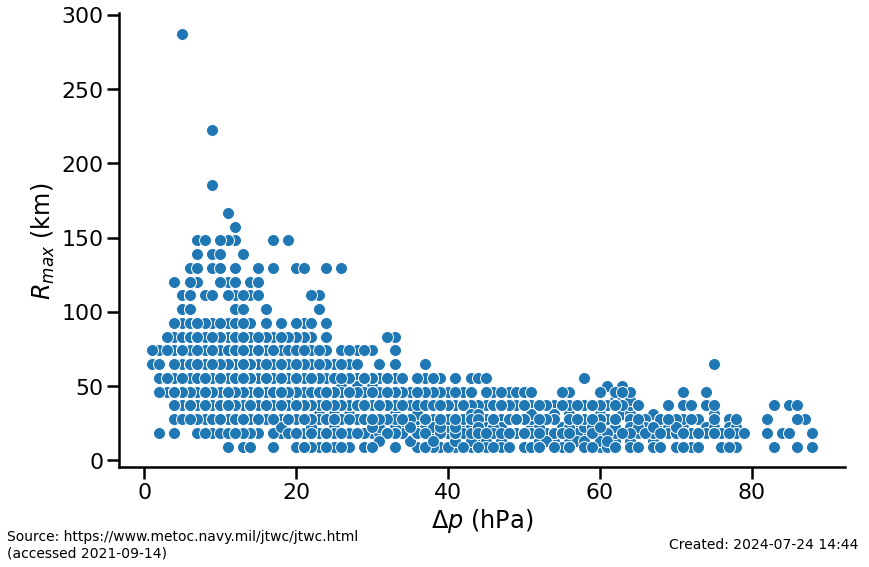

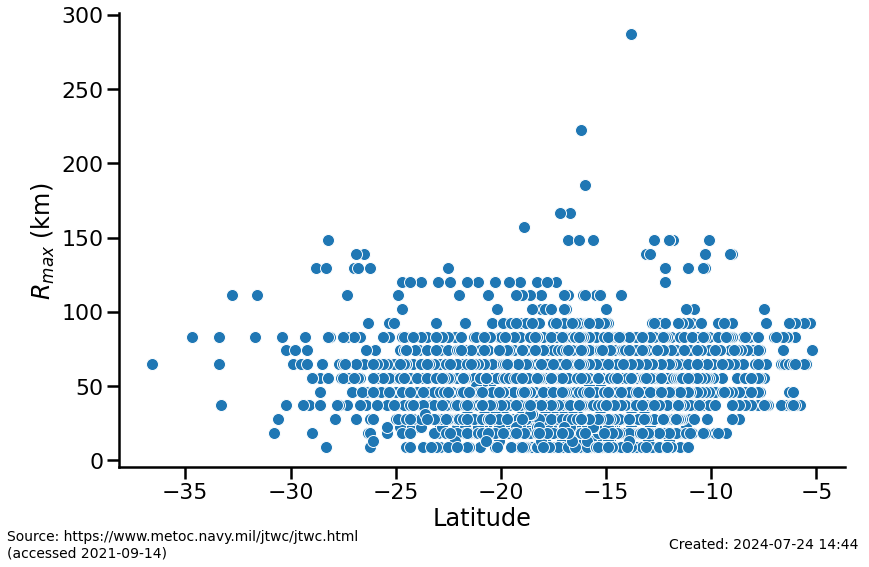

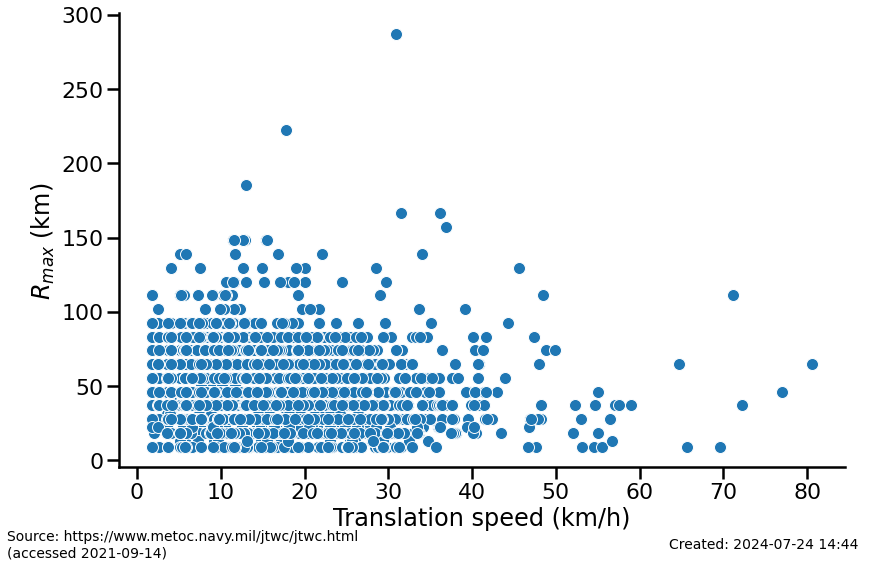

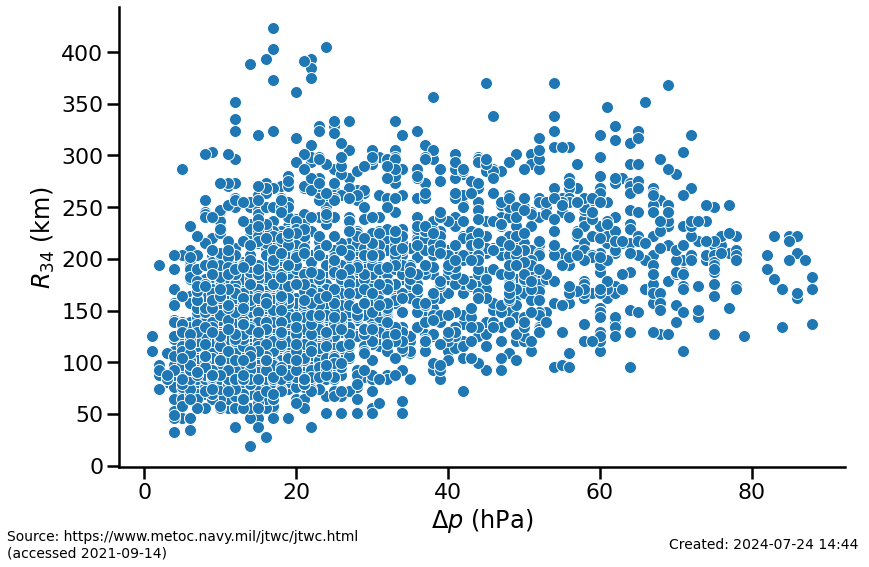

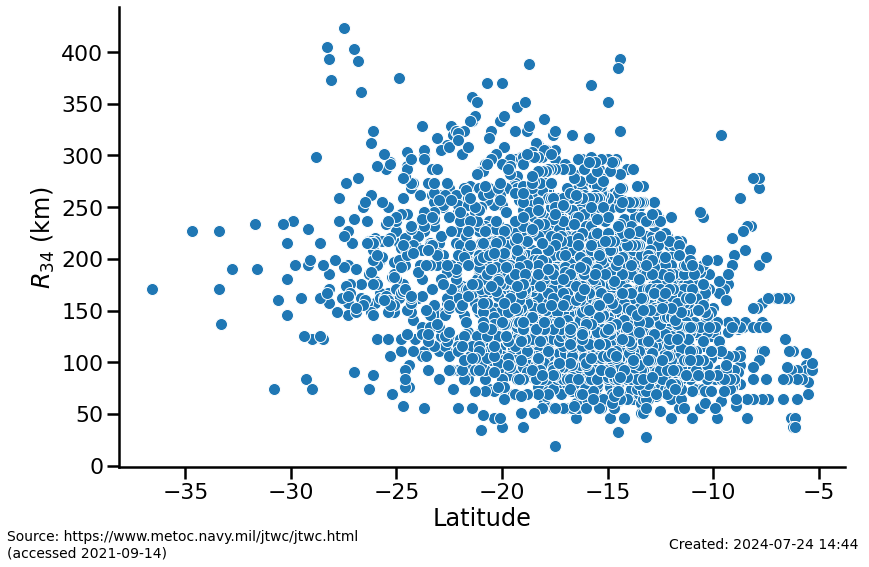

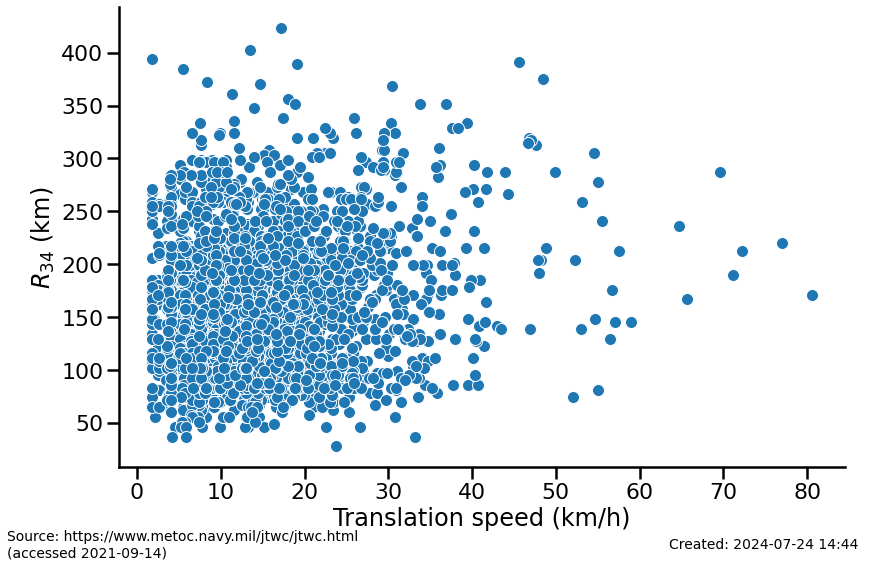

In [6]:
# dP vs Rmax plot
fct = sns.relplot(x=df.dP, y=df.rMax, height=8, aspect=1.5)
fct.ax.set_xlabel(r"$\Delta p$ (hPa)")
fct.ax.set_ylabel(r"$R_{max}$ (km)")
plt.text(0.0, 0.0, "Source: https://www.metoc.navy.mil/jtwc/jtwc.html \n(accessed 2021-09-14)", transform=fct.fig.transFigure, fontsize='xx-small', ha='left')
savefig(os.path.join(output_path, "RMax - dP vs RMax.png"), bbox_inches='tight')

# latitude vs Rmax plot
fct = sns.relplot(x=df.Latitude, y=df.rMax, height=8, aspect=1.5)
fct.ax.set_ylabel(r"$R_{max}$ (km)")
plt.text(0.0, 0.0, "Source: https://www.metoc.navy.mil/jtwc/jtwc.html \n(accessed 2021-09-14)",
          transform=fct.fig.transFigure, fontsize='xx-small', ha='left',)
savefig(os.path.join(output_path, "RMax - Latitude vs RMax.png"), bbox_inches='tight')

# translation speed vs Rmax plot
mask = df.translation_speed > 0
fct = sns.relplot(x=df.translation_speed[mask], y=df.rMax[mask], height=8, aspect=1.5)
fct.ax.set_ylabel(r"$R_{max}$ (km)")
fct.ax.set_xlabel(r"Translation speed (km/h)")
plt.text(0.0, 0.0, "Source: https://www.metoc.navy.mil/jtwc/jtwc.html \n(accessed 2021-09-14)",
          transform=fct.fig.transFigure, fontsize='xx-small', ha='left',)
savefig(os.path.join(output_path, "RMax - Translation Speed vs RMax.png"), bbox_inches='tight')

# dP vs R34 plot
fct = sns.relplot(x=df.dP, y=df.r34, height=8, aspect=1.5)
fct.ax.set_xlabel(r"$\Delta p$ (hPa)")
fct.ax.set_ylabel(r"$R_{34}$ (km)")
plt.text(0.0, 0.0, "Source: https://www.metoc.navy.mil/jtwc/jtwc.html \n(accessed 2021-09-14)", transform=fct.fig.transFigure, fontsize='xx-small', ha='left')
savefig(os.path.join(output_path, "R34 - dP vs R34.png"), bbox_inches='tight')

# latitude vs R34 plot
fct = sns.relplot(x=df.Latitude, y=df.r34, height=8, aspect=1.5)
fct.ax.set_ylabel(r"$R_{34}$ (km)")
plt.text(0.0, 0.0, "Source: https://www.metoc.navy.mil/jtwc/jtwc.html \n(accessed 2021-09-14)",
          transform=fct.fig.transFigure, fontsize='xx-small', ha='left',)
savefig(os.path.join(output_path, "R34 - Latitude vs R34.png"), bbox_inches='tight')

# translation speed vs R34 plot
mask = df.translation_speed > 0
fct = sns.relplot(x=df.translation_speed[mask], y=df.r34[mask], height=8, aspect=1.5)
fct.ax.set_ylabel(r"$R_{34}$ (km)")
fct.ax.set_xlabel(r"Translation speed (km/h)")
plt.text(0.0, 0.0, "Source: https://www.metoc.navy.mil/jtwc/jtwc.html \n(accessed 2021-09-14)",
          transform=fct.fig.transFigure, fontsize='xx-small', ha='left',)
savefig(os.path.join(output_path, "R34 - Translation Speed vs R34.png"), bbox_inches='tight')

Set up the predictors and predictand. We choose the absolute value of the latitude so that conceptually the model is independent of the hemisphere. The model is defined as $ln(R_{mw}) = \alpha + \beta_0 \Delta p + \beta_1 |\lambda| + \epsilon$, where $\epsilon$ is an error term.

In [7]:
mask = ~np.isnan(df.r34.values)
mask &= (df.rMax < df.r34)
X = np.column_stack((df.dP.values[mask], np.abs(df.Latitude.values[mask])))
Xv = np.column_stack((df.Windspeed.values[mask], np.abs(df.Latitude.values[mask])))
ymax = np.log(df.rMax.values[mask])
y34 = np.log(df.r34.values[mask])

We set up the model with fairly uninformative priors - all parameters are initialised with a normal distribution with zero mean. The intercept ($\alpha$) is given a broader distribution ($\sigma=10$), while the coefficients for $\Delta p$ and $\lambda$ are chosen to have unit variance. 

In the code below, we specify a prior for the magnitude of the variance of the error term $\epsilon$ - this means we can estimate the variance $\sigma^2$ to use in a $\mathcal{N}(0,\,\sigma^{2})$ distribution.

In [8]:
with pm.Model() as rmaxmodel:
    alpha = pm.Normal(r"$\alpha$", mu=0, sigma=10)
    beta = pm.Normal(r'$\beta$', mu=0, sigma=1, shape=2)
    mu = alpha + beta[0] * X[:, 0] + beta[1] * X[:, 1]
    epsilon = pm.HalfNormal(r"$\epsilon$", sigma=1)
    y_hat = pm.Normal('y_hat', mu=mu, sigma=epsilon, observed=ymax)
    step = pm.Metropolis()
    trp = pm.sample(10000, tune=5000, step=step, return_inferencedata=True)
    trp.extend(pm.sample_posterior_predictive(trp))

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [$\alpha$]
>Metropolis: [$\beta$]
>Metropolis: [$\epsilon$]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 75 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y_hat]


In [9]:
with pm.Model() as r34model:
    alpha = pm.Normal(r"$\alpha$", mu=0, sigma=10)
    beta = pm.Normal(r'$\beta$', mu=0, sigma=1, shape=2)
    mu = alpha + beta[0] * X[:, 0] + beta[1] * X[:, 1]
    epsilon = pm.HalfNormal(r"$\epsilon$", sigma=1)
    y_hat = pm.Normal('y_hat', mu=mu, sigma=epsilon, observed=y34)
    step = pm.Metropolis()
    trp_r34 = pm.sample(10000, tune=5000, step=step, return_inferencedata=True)
    trp_r34.extend(pm.sample_posterior_predictive(trp_r34))

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [$\alpha$]
>Metropolis: [$\beta$]
>Metropolis: [$\epsilon$]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 77 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y_hat]


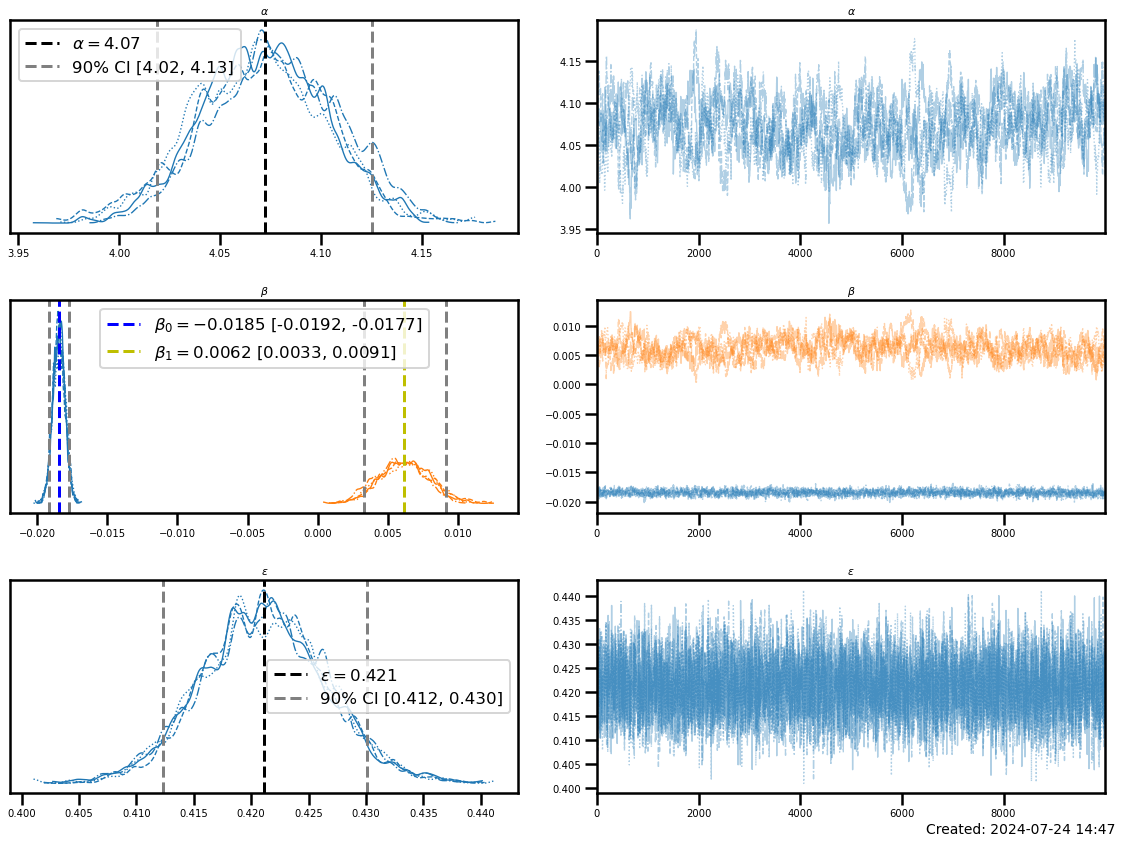

In [10]:
axes = az.plot_trace(trp, combined=False, figsize=(16, 12))
aq = np.quantile(trp.posterior[r'$\alpha$'], [0.05, 0.5, 0.95])
bq = np.quantile(trp.posterior[r'$\beta$'], [0.05, 0.5, 0.95], axis=(0, 1))
eq = np.quantile(trp.posterior[r"$\epsilon$"], [0.05, 0.5, 0.95])

axes[0, 0].axvline(aq[1], ls='--', color='k', label=rf'$\alpha = {{{aq[1]:.2f}}}$')
axes[0, 0].axvline(aq[0], ls='--', color='gray', label=f"90% CI [{aq[0]:.2f}, {aq[2]:.2f}]")
axes[0, 0].axvline(aq[2], ls='--', color='gray')

axes[1, 0].axvline(bq[1, 0], ls='--', color='b', label=rf'$\beta_0 = {{{bq[1, 0]:.4f}}}$ [{bq[0, 0]:.4f}, {bq[2, 0]:.4f}]')
axes[1, 0].axvline(bq[0, 0], ls='--', color='gray',)
axes[1, 0].axvline(bq[2, 0], ls='--', color='gray')

axes[1, 0].axvline(bq[1, 1], ls='--', color='y', label=rf'$\beta_1 = {{{bq[1, 1]:.4f}}}$ [{bq[0, 1]:.4f}, {bq[2, 1]:.4f}]')
axes[1, 0].axvline(bq[0, 1], ls='--', color='gray',)
axes[1, 0].axvline(bq[2, 1], ls='--', color='gray')

axes[2, 0].axvline(eq[1], ls='--', color='k', label=rf'$\epsilon = {{{eq[1]:.3f}}}$')
axes[2, 0].axvline(eq[0], ls='--', color='gray', label=f"90% CI [{eq[0]:.3f}, {eq[2]:.3f}]")
axes[2, 0].axvline(eq[2], ls='--', color='gray')

axes[0, 0].legend(fontsize='x-small')
axes[1, 0].legend(fontsize='x-small')
axes[2, 0].legend(fontsize='x-small')
plt.tight_layout()
savefig(os.path.join(output_path, "rmax_trace.png"), bbox_inches='tight')

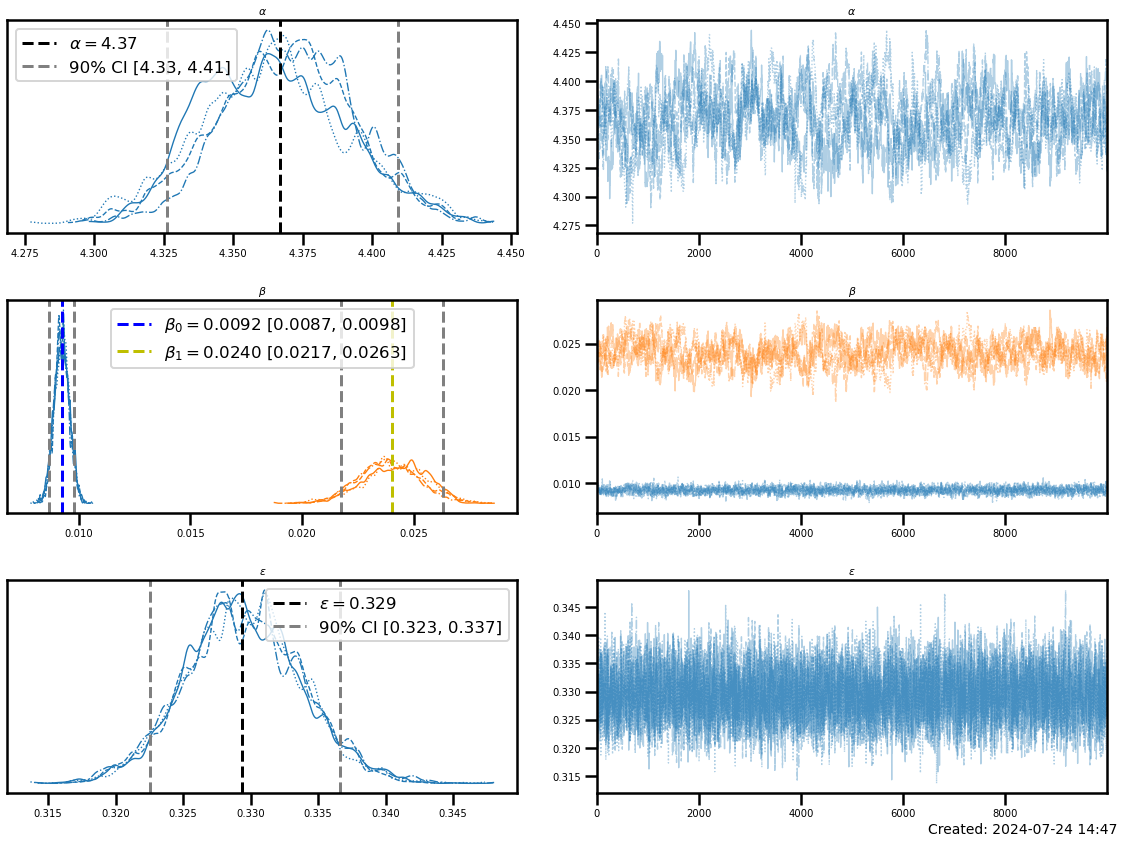

In [11]:
axes = az.plot_trace(trp_r34, combined=False, figsize=(16, 12))
aq = np.quantile(trp_r34.posterior[r'$\alpha$'], [0.05, 0.5, 0.95])
bq = np.quantile(trp_r34.posterior[r'$\beta$'], [0.05, 0.5, 0.95], axis=(0, 1))
eq = np.quantile(trp_r34.posterior[r"$\epsilon$"], [0.05, 0.5, 0.95])

axes[0, 0].axvline(aq[1], ls='--', color='k', label=rf'$\alpha = {{{aq[1]:.2f}}}$')
axes[0, 0].axvline(aq[0], ls='--', color='gray', label=f"90% CI [{aq[0]:.2f}, {aq[2]:.2f}]")
axes[0, 0].axvline(aq[2], ls='--', color='gray')

axes[1, 0].axvline(bq[1, 0], ls='--', color='b', label=rf'$\beta_0 = {{{bq[1, 0]:.4f}}}$ [{bq[0, 0]:.4f}, {bq[2, 0]:.4f}]')
axes[1, 0].axvline(bq[0, 0], ls='--', color='gray',)
axes[1, 0].axvline(bq[2, 0], ls='--', color='gray')

axes[1, 0].axvline(bq[1, 1], ls='--', color='y', label=rf'$\beta_1 = {{{bq[1, 1]:.4f}}}$ [{bq[0, 1]:.4f}, {bq[2, 1]:.4f}]')
axes[1, 0].axvline(bq[0, 1], ls='--', color='gray',)
axes[1, 0].axvline(bq[2, 1], ls='--', color='gray')

axes[2, 0].axvline(eq[1], ls='--', color='k', label=rf'$\epsilon = {{{eq[1]:.3f}}}$')
axes[2, 0].axvline(eq[0], ls='--', color='gray', label=f"90% CI [{eq[0]:.3f}, {eq[2]:.3f}]")
axes[2, 0].axvline(eq[2], ls='--', color='gray')

axes[0, 0].legend(fontsize='x-small')
axes[1, 0].legend(fontsize='x-small')
axes[2, 0].legend(fontsize='x-small')
plt.tight_layout()
savefig(os.path.join(output_path, "r34_trace.png"), bbox_inches='tight')

In [12]:
az.summary(trp, round_to=4, hdi_prob=0.9,).to_csv(os.path.join(output_path, "rmw_fitsummary.csv"))
az.summary(trp_r34, round_to=4, hdi_prob=0.9,).to_csv(os.path.join(output_path, "r34_fitsummary.csv"))

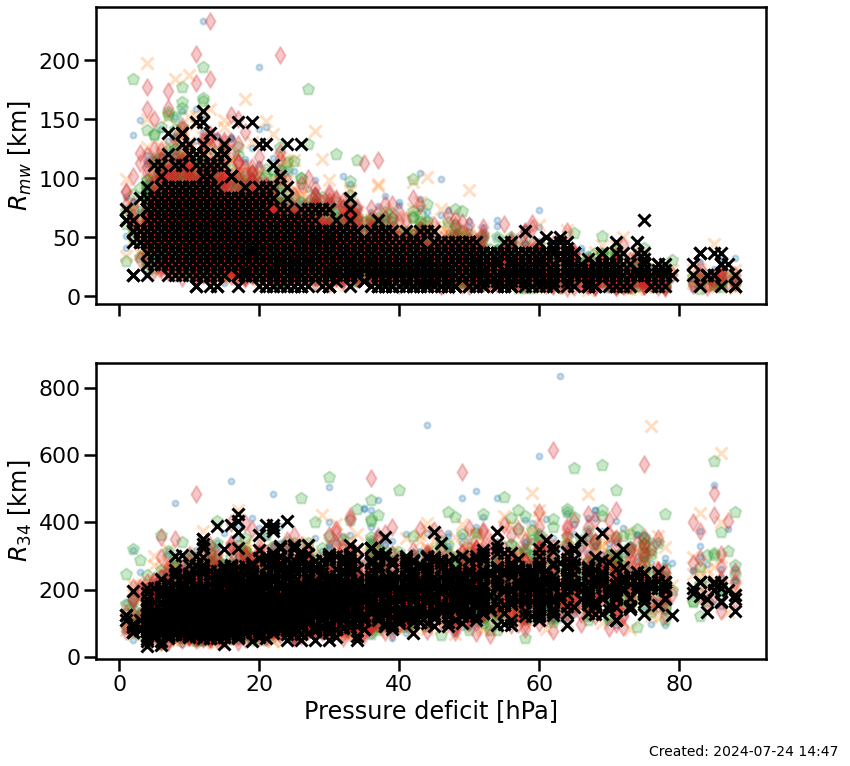

In [13]:
#trace.posterior['ymodel'] = trace.posterior['alpha'] + trace.posterior['beta'] * xr.DataArray(X) + trace.posterior['error']
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

ax[0].scatter(X[:,0], np.exp(trp.posterior_predictive['y_hat'][0, 0, :]), marker='.', alpha=0.25)
ax[0].scatter(X[:,0], np.exp(trp.posterior_predictive['y_hat'][1, 0, :]), marker='x', alpha=0.25)
ax[0].scatter(X[:,0], np.exp(trp.posterior_predictive['y_hat'][2, 0, :]), marker='p', alpha=0.25)
ax[0].scatter(X[:,0], np.exp(trp.posterior_predictive['y_hat'][3, 0, :]), marker='d', alpha=0.25)
ax[0].scatter(X[:, 0], np.exp(ymax), marker='x', c='k')
ax[0].set_ylabel(r"$R_{mw}$ [km]")

ax[1].scatter(X[:,0], np.exp(trp_r34.posterior_predictive['y_hat'][0, 0, :]), marker='.', alpha=0.25)
ax[1].scatter(X[:,0], np.exp(trp_r34.posterior_predictive['y_hat'][1, 0, :]), marker='x', alpha=0.25)
ax[1].scatter(X[:,0], np.exp(trp_r34.posterior_predictive['y_hat'][2, 0, :]), marker='p', alpha=0.25)
ax[1].scatter(X[:,0], np.exp(trp_r34.posterior_predictive['y_hat'][3, 0, :]), marker='d', alpha=0.25)
ax[1].scatter(X[:, 0], np.exp(y34), marker='x', c='k')
ax[1].set_ylabel(r"$R_{34}$ [km]")
ax[1].set_xlabel("Pressure deficit [hPa]")
savefig(os.path.join(output_path, "rmw_r34_dp.png"), bbox_inches="tight")

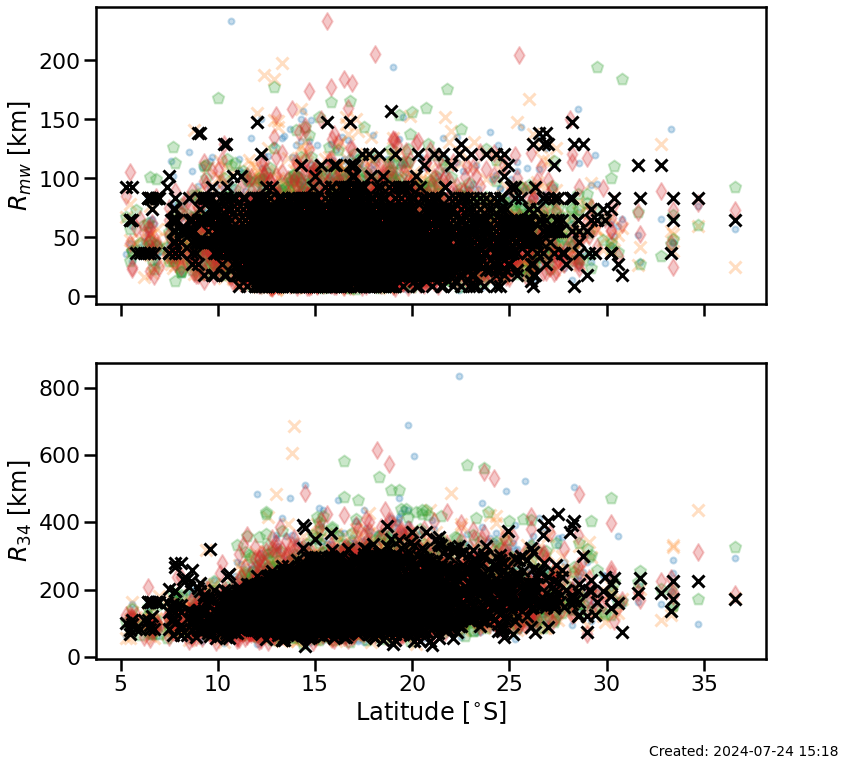

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax[0].scatter(X[:, 1], np.exp(trp.posterior_predictive['y_hat'][0, 0, :]), marker='.', alpha=0.25)
ax[0].scatter(X[:, 1], np.exp(trp.posterior_predictive['y_hat'][1, 0, :]), marker='x', alpha=0.25)
ax[0].scatter(X[:, 1], np.exp(trp.posterior_predictive['y_hat'][2, 0, :]), marker='p', alpha=0.25)
ax[0].scatter(X[:, 1], np.exp(trp.posterior_predictive['y_hat'][3, 0, :]), marker='d', alpha=0.25)
ax[0].scatter(X[:, 1], np.exp(ymax), marker='x', c='k')
ax[0].set_ylabel(r"$R_{mw}$ [km]")

ax[1].scatter(X[:, 1], np.exp(trp_r34.posterior_predictive['y_hat'][0, 0, :]), marker='.', alpha=0.25)
ax[1].scatter(X[:, 1], np.exp(trp_r34.posterior_predictive['y_hat'][1, 0, :]), marker='x', alpha=0.25)
ax[1].scatter(X[:, 1], np.exp(trp_r34.posterior_predictive['y_hat'][2, 0, :]), marker='p', alpha=0.25)
ax[1].scatter(X[:, 1], np.exp(trp_r34.posterior_predictive['y_hat'][3, 0, :]), marker='d', alpha=0.25)
ax[1].scatter(X[:, 1], np.exp(y34), marker='x', c='k')
ax[1].set_ylabel(r"$R_{34}$ [km]")
ax[1].set_xlabel(r"Latitude [$^{\circ}$S]")
savefig(os.path.join(output_path, "rmw_r34_lat.png"), bbox_inches="tight")

Now use maximum sustained wind speed as the intensity predictor. In some models, we may use maximum sustained winds as the intensity measure. In JTWC datasets, the maximum sustained wind is a 1-minute sustained wind speed. When using this model of $R_{max}$ and $R_{34}$, the intensity measure should be converted to a 1-minute sustained wind speed.

In [15]:
with pm.Model() as rmaxmodel:
    alpha = pm.Normal(r"$\alpha$", mu=0, sigma=10)
    beta = pm.Normal(r"$\beta$", mu=0, sigma=1, shape=2)
    mu = alpha + beta[0] * Xv[:, 0] + beta[1] * Xv[:, 1]
    epsilon = pm.HalfNormal(r"$\epsilon$", sigma=1)
    y_hat = pm.Normal('y_hat', mu=mu, sigma=epsilon, observed=ymax)
    step = pm.Metropolis()
    trv_max = pm.sample(10000, tune=5000, step=step, return_inferencedata=True)
    trv_max.extend(pm.sample_posterior_predictive(trv_max))

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [$\alpha$]
>Metropolis: [$\beta$]
>Metropolis: [$\epsilon$]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 80 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y_hat]


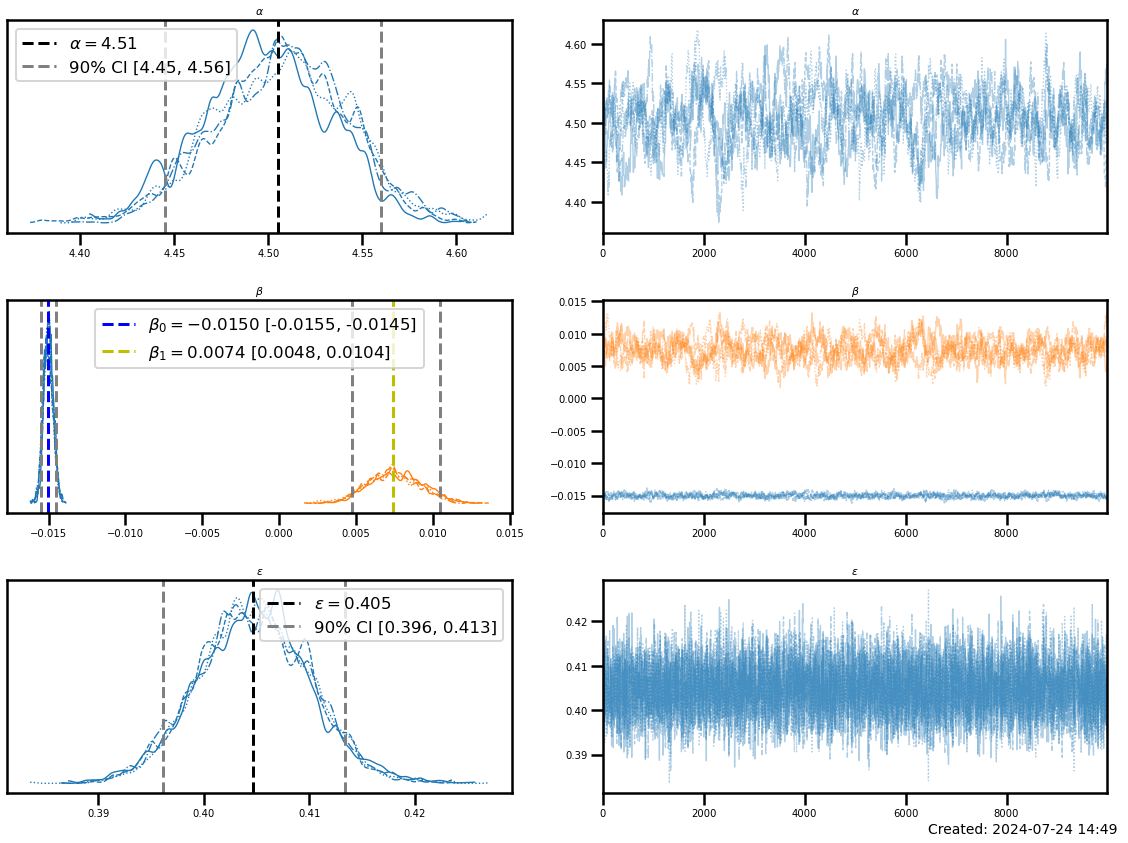

In [16]:
axes = az.plot_trace(trv_max, combined=False, figsize=(16, 12))
aq = np.quantile(trv_max.posterior[r"$\alpha$"], [0.05, 0.5, 0.95])
bq = np.quantile(trv_max.posterior[r"$\beta$"], [0.05, 0.5, 0.95], axis=(0, 1))
eq = np.quantile(trv_max.posterior[r"$\epsilon$"], [0.05, 0.5, 0.95])

axes[0, 0].axvline(aq[1], ls='--', color='k', label=rf'$\alpha = {{{aq[1]:.2f}}}$')
axes[0, 0].axvline(aq[0], ls='--', color='gray', label=f"90% CI [{aq[0]:.2f}, {aq[2]:.2f}]")
axes[0, 0].axvline(aq[2], ls='--', color='gray')

axes[1, 0].axvline(bq[1, 0], ls='--', color='b', label=rf'$\beta_0 = {{{bq[1, 0]:.4f}}}$ [{bq[0, 0]:.4f}, {bq[2, 0]:.4f}]')
axes[1, 0].axvline(bq[0, 0], ls='--', color='gray',)
axes[1, 0].axvline(bq[2, 0], ls='--', color='gray')

axes[1, 0].axvline(bq[1, 1], ls='--', color='y', label=rf'$\beta_1 = {{{bq[1, 1]:.4f}}}$ [{bq[0, 1]:.4f}, {bq[2, 1]:.4f}]')
axes[1, 0].axvline(bq[0, 1], ls='--', color='gray',)
axes[1, 0].axvline(bq[2, 1], ls='--', color='gray')

axes[2, 0].axvline(eq[1], ls='--', color='k', label=rf'$\epsilon = {{{eq[1]:.3f}}}$')
axes[2, 0].axvline(eq[0], ls='--', color='gray', label=f"90% CI [{eq[0]:.3f}, {eq[2]:.3f}]")
axes[2, 0].axvline(eq[2], ls='--', color='gray')

axes[0, 0].legend(fontsize='x-small')
axes[1, 0].legend(fontsize='x-small')
axes[2, 0].legend(fontsize='x-small')
plt.tight_layout()
savefig(os.path.join(output_path, "rmax_vmax_trace.png"), bbox_inches='tight')

In [17]:
az.summary(trv_max, round_to=4, hdi_prob=0.9,).to_csv(os.path.join(output_path, "rmw_vmax_fitsummary.csv"))

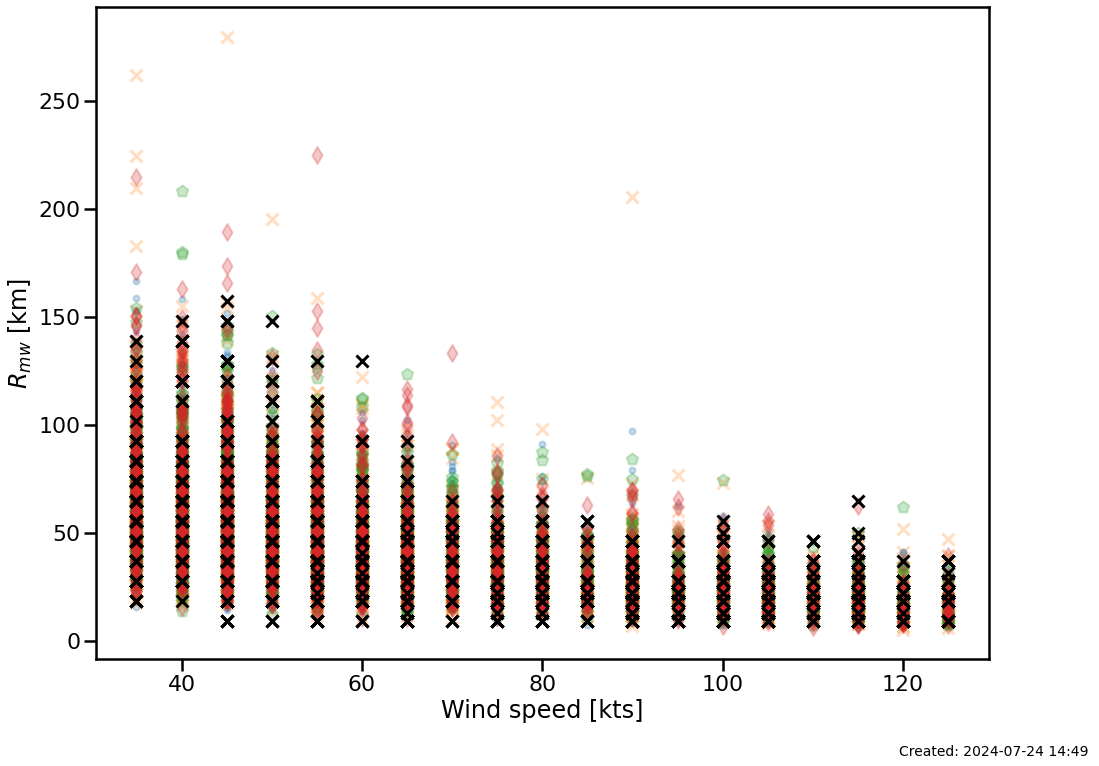

In [18]:
plt.scatter(Xv[:, 0], np.exp(trv_max.posterior_predictive['y_hat'][0, 0, :]), marker='.', alpha=0.25)
plt.scatter(Xv[:, 0], np.exp(trv_max.posterior_predictive['y_hat'][1, 0, :]), marker='x', alpha=0.25)
plt.scatter(Xv[:, 0], np.exp(trv_max.posterior_predictive['y_hat'][2, 0, :]), marker='p', alpha=0.25)
plt.scatter(Xv[:, 0], np.exp(trv_max.posterior_predictive['y_hat'][3, 0, :]), marker='d', alpha=0.25)
plt.scatter(Xv[:, 0], np.exp(ymax), marker='x', c='k')
plt.xlabel("Wind speed [kts]")
plt.ylabel(r"$R_{mw}$ [km]")
savefig(os.path.join(output_path, "rmw_vmax.png"), bbox_inches="tight")

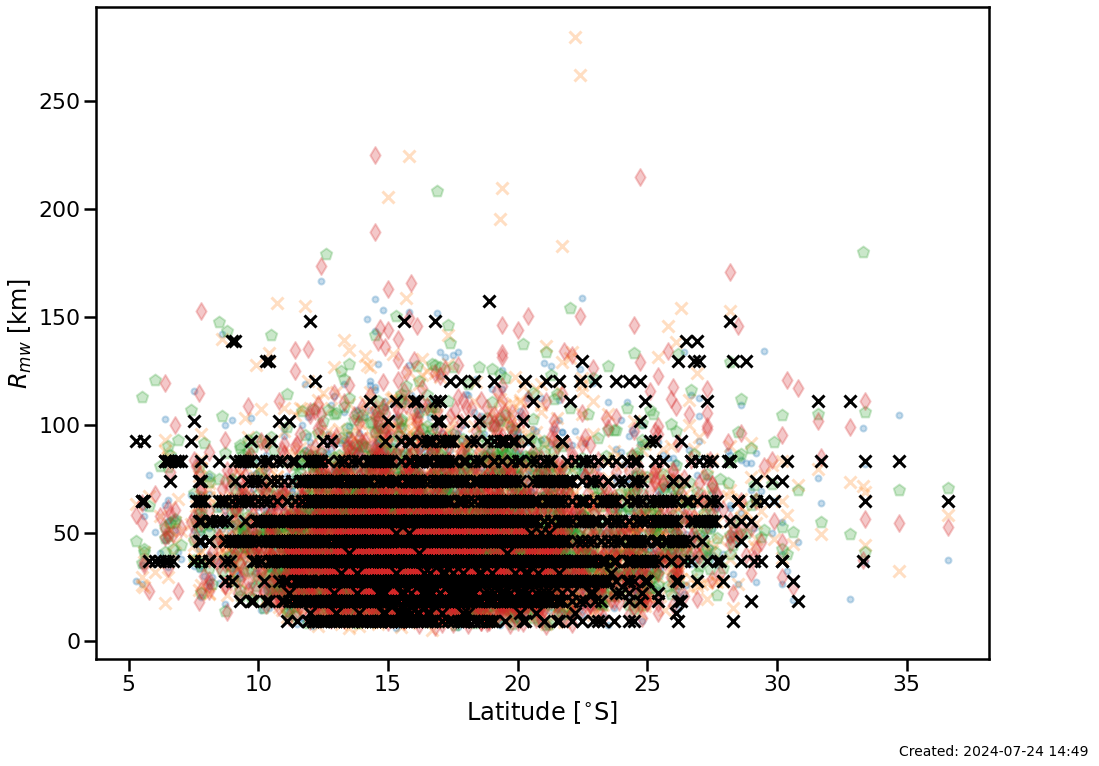

In [19]:
plt.scatter(Xv[:, 1], np.exp(trv_max.posterior_predictive['y_hat'][0, 0, :]), marker='.', alpha=0.25)
plt.scatter(Xv[:, 1], np.exp(trv_max.posterior_predictive['y_hat'][1, 0, :]), marker='x', alpha=0.25)
plt.scatter(Xv[:, 1], np.exp(trv_max.posterior_predictive['y_hat'][2, 0, :]), marker='p', alpha=0.25)
plt.scatter(Xv[:, 1], np.exp(trv_max.posterior_predictive['y_hat'][3, 0, :]), marker='d', alpha=0.25)
plt.scatter(Xv[:, 1], np.exp(ymax), marker='x', c='k')
plt.xlabel(r"Latitude [$^{\circ}$S]")
plt.ylabel(r"$R_{mw}$ [km]")

savefig(os.path.join(output_path, "rmw_vmax_lat.png"), bbox_inches="tight")

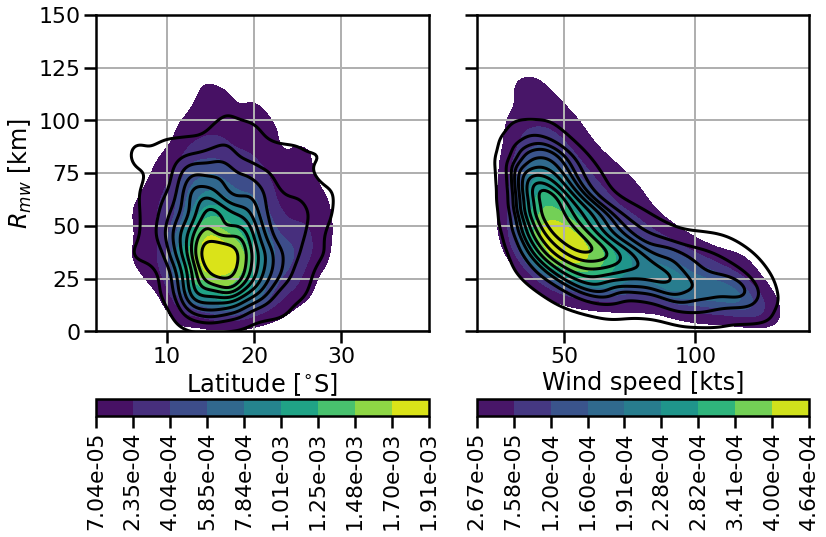

In [20]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 8))
sns.kdeplot(x=Xv[:, 1], y = np.exp(trv_max.posterior_predictive['y_hat'][0, 0, :]),
            fill=True, ax=ax[0], cbar=True, cmap='viridis',
            cbar_kws={'orientation': 'horizontal', 'format': "{x:.2e}"})
sns.kdeplot(x=Xv[:, 1], y = np.exp(ymax), ax=ax[0], color='k')
c_bar = ax[0].collections[0].colorbar
c_bar.ax.tick_params(rotation=90)
sns.kdeplot(x=Xv[:, 0], y = np.exp(trv_max.posterior_predictive['y_hat'][0, 0, :]),
            fill=True, ax=ax[1],  cbar=True, cmap='viridis',
            cbar_kws={'orientation': 'horizontal', 'format': "{x:.2e}"})
sns.kdeplot(x=Xv[:, 0], y = np.exp(ymax), ax=ax[1], color='k')
c_bar = ax[1].collections[0].colorbar
c_bar.ax.tick_params(rotation=90)
ax[0].grid()
ax[1].grid()
ax[0].set_ylim((0, 150))
ax[0].set_ylabel(r"$R_{mw}$ [km]")
ax[0].set_xlabel(r"Latitude [$^{\circ}$S]")
ax[1].set_xlabel("Wind speed [kts]")
fig.tight_layout()

In [21]:
Xv = np.column_stack((df.Windspeed.values[mask], np.abs(df.Latitude.values[mask])))
y = np.log(df.r34.values[mask])

In [22]:
with pm.Model() as rmaxmodel:
    alpha = pm.Normal(r"$\alpha$", mu=0, sigma=10)
    beta = pm.Normal(r"$\beta$", mu=0, sigma=1, shape=2)
    mu = alpha + beta[0] * Xv[:, 0] + beta[1] * Xv[:, 1]
    epsilon = pm.HalfNormal(r"$\epsilon$", sigma=1)
    y_hat = pm.Normal('y_hat', mu=mu, sigma=epsilon, observed=y)
    step = pm.Metropolis()
    trv_r34 = pm.sample(10000, tune=5000, step=step, return_inferencedata=True)
    trv_r34.extend(pm.sample_posterior_predictive(trv_r34))

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [$\alpha$]
>Metropolis: [$\beta$]
>Metropolis: [$\epsilon$]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 71 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y_hat]


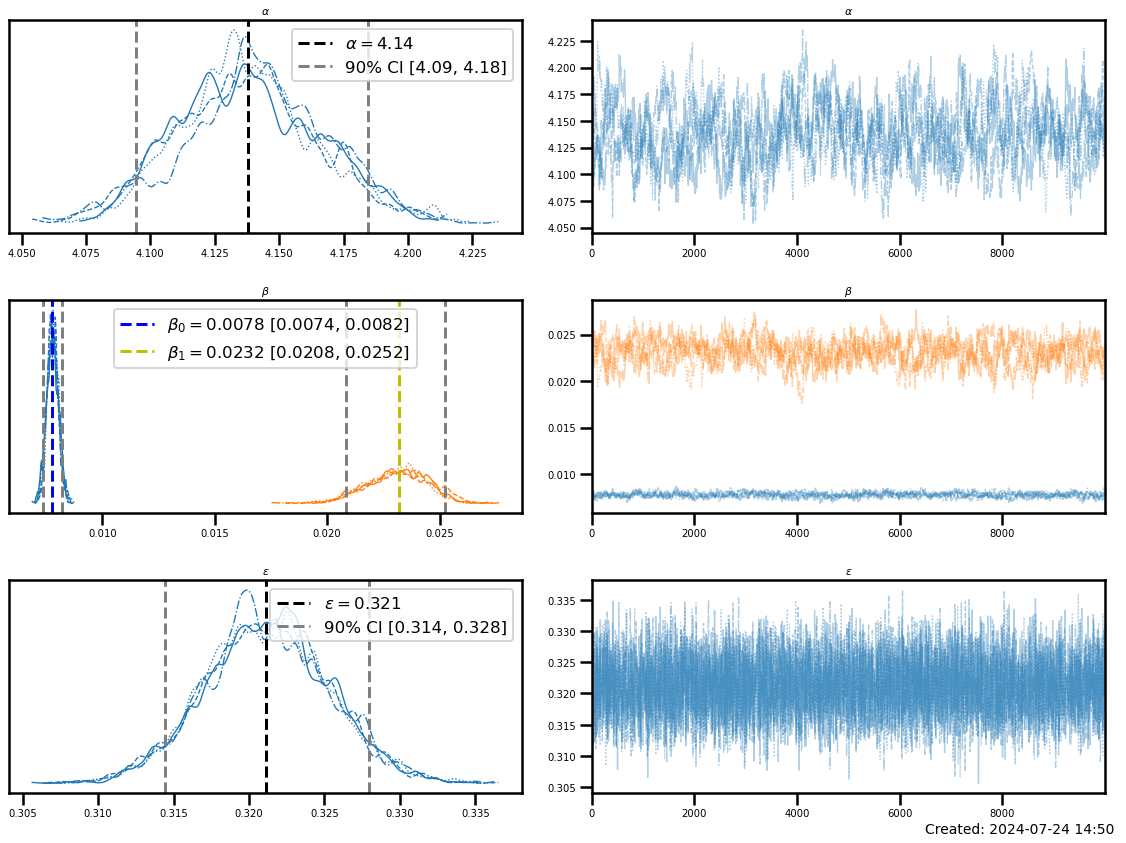

In [23]:
axes = az.plot_trace(trv_r34, combined=False, figsize=(16, 12))
aq = np.quantile(trv_r34.posterior[r"$\alpha$"], [0.05, 0.5, 0.95])
bq = np.quantile(trv_r34.posterior[r"$\beta$"], [0.05, 0.5, 0.95], axis=(0, 1))
eq = np.quantile(trv_r34.posterior[r"$\epsilon$"], [0.05, 0.5, 0.95])

axes[0, 0].axvline(aq[1], ls='--', color='k', label=rf'$\alpha = {{{aq[1]:.2f}}}$')
axes[0, 0].axvline(aq[0], ls='--', color='gray', label=f"90% CI [{aq[0]:.2f}, {aq[2]:.2f}]")
axes[0, 0].axvline(aq[2], ls='--', color='gray')

axes[1, 0].axvline(bq[1, 0], ls='--', color='b', label=rf'$\beta_0 = {{{bq[1, 0]:.4f}}}$ [{bq[0, 0]:.4f}, {bq[2, 0]:.4f}]')
axes[1, 0].axvline(bq[0, 0], ls='--', color='gray',)
axes[1, 0].axvline(bq[2, 0], ls='--', color='gray')

axes[1, 0].axvline(bq[1, 1], ls='--', color='y', label=rf'$\beta_1 = {{{bq[1, 1]:.4f}}}$ [{bq[0, 1]:.4f}, {bq[2, 1]:.4f}]')
axes[1, 0].axvline(bq[0, 1], ls='--', color='gray',)
axes[1, 0].axvline(bq[2, 1], ls='--', color='gray')

axes[2, 0].axvline(eq[1], ls='--', color='k', label=rf'$\epsilon = {{{eq[1]:.3f}}}$')
axes[2, 0].axvline(eq[0], ls='--', color='gray', label=f"90% CI [{eq[0]:.3f}, {eq[2]:.3f}]")
axes[2, 0].axvline(eq[2], ls='--', color='gray')

axes[0, 0].legend(fontsize='x-small')
axes[1, 0].legend(fontsize='x-small')
axes[2, 0].legend(fontsize='x-small')
plt.tight_layout()
savefig(os.path.join(output_path, "r34_vmax_trace.png"), bbox_inches='tight')

In [24]:
az.summary(trv_r34, round_to=4, hdi_prob=0.9,).to_csv(os.path.join(output_path, "r34_vmax_fitsummary.csv"))

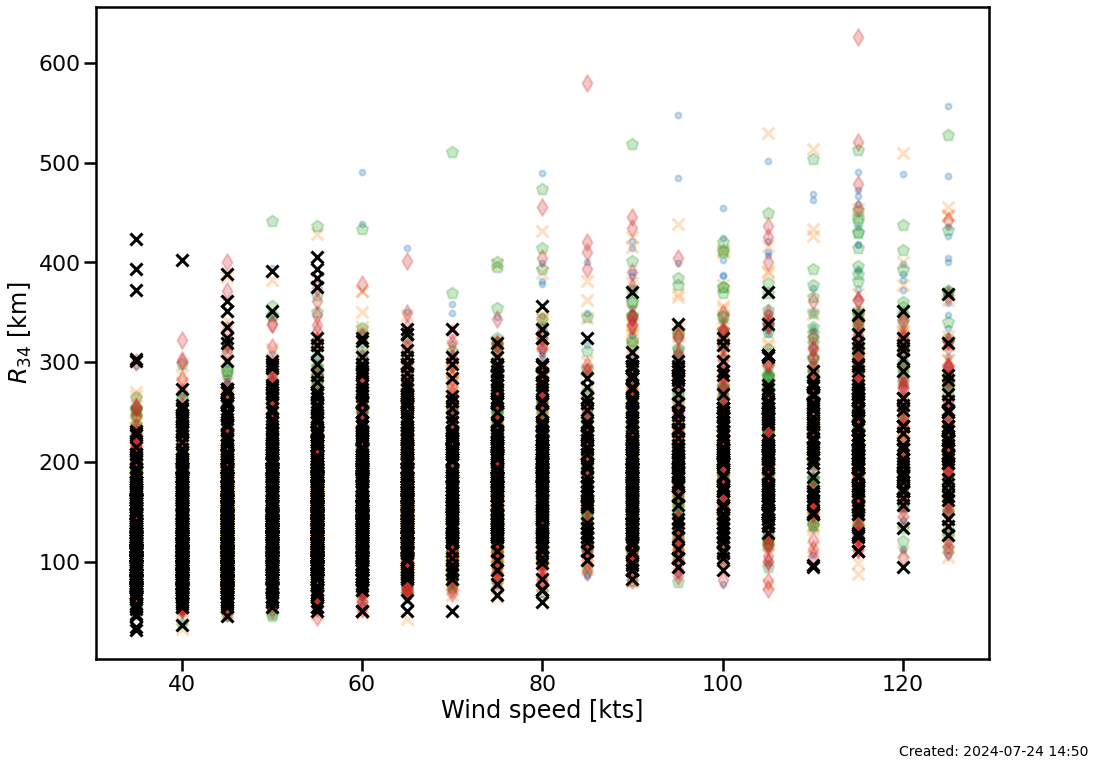

In [25]:
plt.scatter(Xv[:,0], np.exp(trv_r34.posterior_predictive['y_hat'][0, 0, :]), marker='.', alpha=0.25)
plt.scatter(Xv[:,0], np.exp(trv_r34.posterior_predictive['y_hat'][1, 0, :]), marker='x', alpha=0.25)
plt.scatter(Xv[:,0], np.exp(trv_r34.posterior_predictive['y_hat'][2, 0, :]), marker='p', alpha=0.25)
plt.scatter(Xv[:,0], np.exp(trv_r34.posterior_predictive['y_hat'][3, 0, :]), marker='d', alpha=0.25)
plt.scatter(Xv[:, 0], np.exp(y), marker='x', c='k')
plt.xlabel("Wind speed [kts]")
plt.ylabel(r"$R_{34}$ [km]")
savefig(os.path.join(output_path, "r34_vmax.png"), bbox_inches="tight")

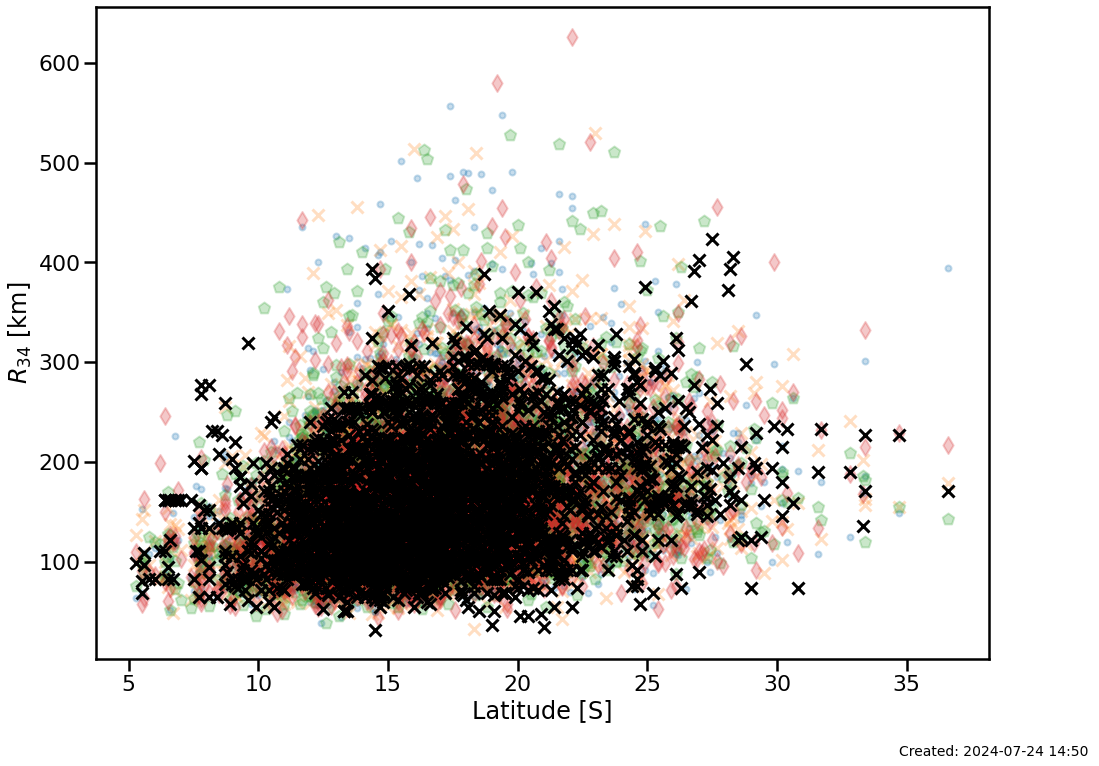

In [26]:
plt.scatter(Xv[:, 1], np.exp(trv_r34.posterior_predictive['y_hat'][0, 0, :]), marker='.', alpha=0.25)
plt.scatter(Xv[:, 1], np.exp(trv_r34.posterior_predictive['y_hat'][1, 0, :]), marker='x', alpha=0.25)
plt.scatter(Xv[:, 1], np.exp(trv_r34.posterior_predictive['y_hat'][2, 0, :]), marker='p', alpha=0.25)
plt.scatter(Xv[:, 1], np.exp(trv_r34.posterior_predictive['y_hat'][3, 0, :]), marker='d', alpha=0.25)
plt.scatter(Xv[:, 1], np.exp(y), marker='x', c='k')
plt.xlabel("Latitude [S]")
plt.ylabel(r"$R_{34}$ [km]")
savefig(os.path.join(output_path, "r34_vmax_lat.png"), bbox_inches="tight")

In [27]:

arm, b0rm, b1rm, _ = az.summary(trv_max, round_to=4, hdi_prob=0.9,)['mean']
a34, b034, b134, _ = az.summary(trv_r34, round_to=4, hdi_prob=0.9,)['mean']

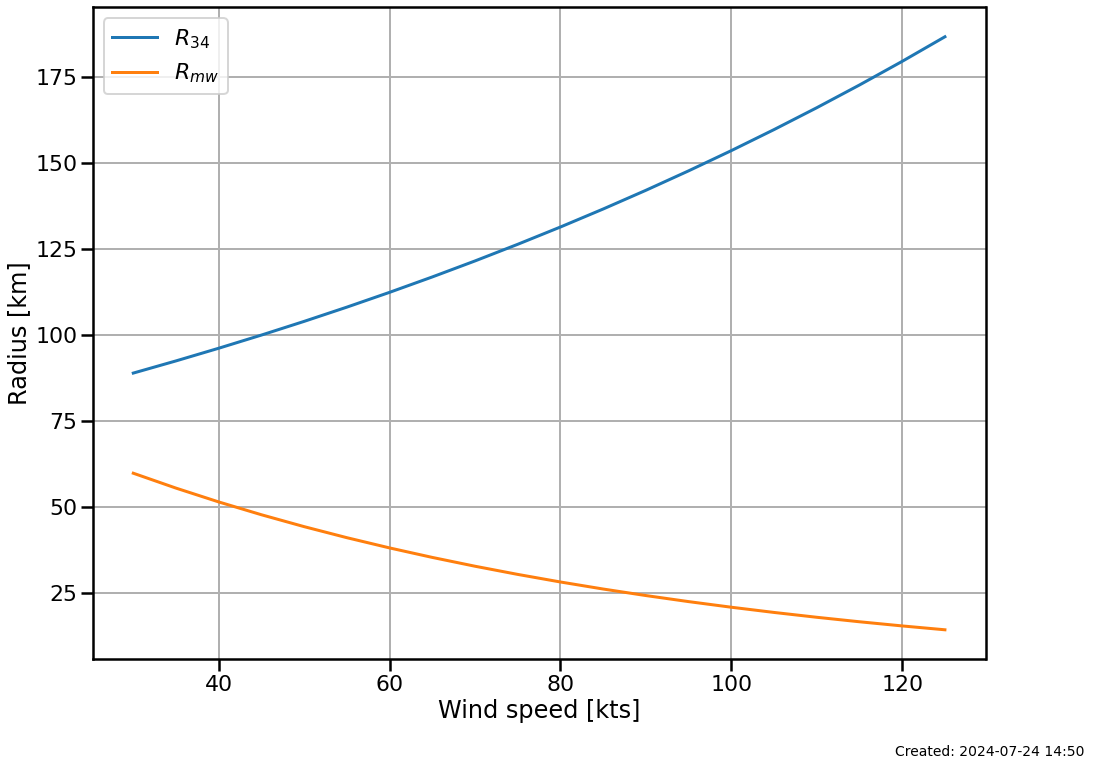

In [28]:
v = np.arange(30, 130, 5)
phi = 5.
r34 = np.exp(a34 + b034 * v + b134 * phi)
rmw = np.exp(arm + b0rm * v + b1rm * phi)

plt.plot(v, r34, label=r"$R_{34}$")
plt.plot(v, rmw, label=r"$R_{mw}$")
plt.legend()
plt.xlabel("Wind speed [kts]")
plt.ylabel("Radius [km]")
plt.grid()
savefig(os.path.join(output_path, "rmw_r34.png"), bbox_inches='tight')